In [1]:
import pandas as pd

In [2]:
mg = pd.read_json("./math_gen2.json")

In [3]:
len(mg)

16118

In [4]:
mg.head()

,advisors,deg_uni_year,id,img_alt,name,students
0,"[{'link': 'id.php?id=28320', 'name': 'Sholto P...",Ph.D. University of Washington 2014,230516,Tree|UnitedStates,Gautam Sisodia,[]
1,"[{'link': 'id.php?id=47087', 'name': 'John Cou...",Ph.D. University of Leeds 1981,28320,Tree|UnitedKingdom,Sholto Paul Smith,"[{'link': 'id.php?id=28246', 'name': 'Mori, Iz..."
2,"[{'link': 'id.php?id=28320', 'name': 'Sholto P...",Ph.D. University of Washington 1998,28246,Tree|UnitedStates,Izuru Mori,[]
3,"[{'link': 'id.php?id=28320', 'name': 'Sholto P...",Ph.D. University of Washington 2001,57845,Tree|UnitedStates,Adam Nyman,[]
4,"[{'link': 'id.php?id=28320', 'name': 'Sholto P...",Ph.D. University of Washington 1988,28247,Tree|UnitedStates,Patrick Thomas Perkins,[]


In [5]:
mg.tail()

,advisors,deg_uni_year,id,img_alt,name,students
16113,"[{'link': 'id.php?id=149158', 'name': 'David ...",Ph.D. Northeastern University 2008,183469,Tree|UnitedStates,Dimitar Georgiev Valchev,[]
16114,"[{'link': 'id.php?id=75417', 'name': 'Sergio ...",Ph.D. Princeton University 2010,149153,Tree|UnitedStates,Aman Jain,[]
16115,"[{'link': 'id.php?id=97416', 'name': 'Sanjeev ...",Ph.D. Princeton University 2007,148990,Tree|UnitedStates,Aurelie Lozano,[]
16116,"[{'link': 'id.php?id=75417', 'name': 'Sergio ...",Ph.D. Princeton University 1991,149157,Tree|UnitedStates,Roger Cheng,"[{'link': 'id.php?id=226137', 'name': 'Chen, S..."
16117,"[{'link': 'id.php?id=149157', 'name': 'Roger ...",Ph.D. Hong Kong University of Science and Tech...,226137,Tree|HongKong,Shibo Chen,[]


In [6]:
mg["num_students"] = mg.students.map(len)

In [7]:
mg.sort_values("num_students", ascending = False).head()

,advisors,deg_uni_year,id,img_alt,name,students,num_students
12144,"[{'link': 'id.php?id=64318', 'name': 'Bernard ...",Ph.D. Massachusetts Institute of Technology 1987,93643,Tree|UnitedStates,C.-C. Jay Kuo,"[{'link': 'id.php?id=135405', 'name': 'Baek, W...",147
6664,"[{'link': 'id.php?id=36703', 'name': 'Jacques-...",Ph.D. Université de Paris 1967,11498,Tree|France,Roger Meyer Temam,"[{'link': 'id.php?id=56557', 'name': 'Abergel,...",124
4017,"[{'link': 'id.php?id=114762', 'name': 'Lev Ana...",Ph.D. Lomonosov Moscow State University 1967,65093,Tree|Russia,Alexander Vasil'evich Mikhalëv,"[{'link': 'id.php?id=118800', 'name': 'Agapito...",100
1813,"[{'link': 'id.php?id=21560', 'name': 'Erhard ...",Ph.D. Ludwig-Maximilians-Universität München 1966,21566,Tree|Germany,Willi Jäger,"[{'link': 'id.php?id=37263', 'name': 'Alt, Wol...",100
3491,"[{'link': 'id.php?id=9041', 'name': 'Robert Le...",Ph.D. Cornell University 1974,35475,Tree|UnitedStates,Kurt Mehlhorn,"[{'link': 'id.php?id=196051', 'name': 'Abed, F...",86


In [8]:
mg.img_alt.value_counts().iloc[:20]

Tree|UnitedStates     6079
Tree|Germany          1907
Tree|France           1193
Tree|UnitedKingdom     845
Tree                   660
Tree|Canada            605
Tree|Netherlands       585
Tree|Switzerland       288
Tree|Italy             235
Tree|Australia         226
Tree|Russia            226
Tree|Belgium           217
Tree|Spain             214
Tree|Israel            212
Tree|Sweden            202
Tree|Brazil            177
Tree|Iran              164
Tree|Austria           134
Tree|Romania           130
Tree|India             117
Name: img_alt, dtype: int64

In [9]:
mg["year"] = mg.deg_uni_year.str.split(" ").map(lambda x: x[-1])

In [10]:
year_counts = mg.assign(num_degrees = 1).groupby(["year"], as_index = False)["num_degrees"].sum()

In [11]:
%matplotlib inline

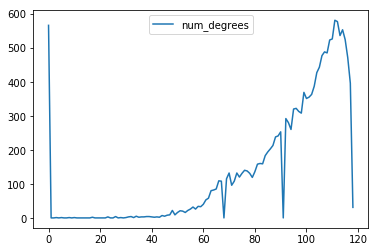

In [12]:
year_counts.plot()

In [13]:
year_counts.sort_values("num_degrees", ascending = False).head()

,year,num_degrees
111,2012,582
112,2013,578
0,,567
114,2015,554
113,2014,537


In [14]:
year_counts.sort_values("num_degrees", ascending = True).iloc[:20]

,year,num_degrees
29,1932,1
91,"1992,1994",1
27,1930,1
25,1928,1
24,1927,1
22,1925,1
21,1922,1
20,1921,1
19,1920,1
18,1919,1


In [15]:
mg[mg.year == "1992,1994"]

,advisors,deg_uni_year,id,img_alt,name,students,num_students,year
480,"[{'link': 'id.php?id=53335', 'name': 'Štefan ...",Ph.D. Comenius University and McMaster Univers...,37866,Tree|Slovakia|Canada,Dalibor Froncek,"[{'link': 'id.php?id=89821', 'name': 'Kovar, P...",4,"1992,1994"


In [16]:
year_counts.sort_values("year", ascending = True).head()

,year,num_degrees
0,,567
1,1863,1
2,1867,1
3,1883,2
4,1890,1


In [17]:
mg["degree"] = mg.deg_uni_year.str.split(" ").map(lambda x: x[0])

In [18]:
mg.degree.value_counts().head()

Ph.D.       13647
Dr.          1148
              393
Ph.           199
Dr.-Ing.      164
Name: degree, dtype: int64

In [19]:
mg["uni"] = mg.deg_uni_year.str.split(" ").map(lambda x: " ".join(x[1:-1]))

In [20]:
mg.uni.value_counts().iloc[:20]

                                               648
Massachusetts Institute of Technology          303
University of California, Berkeley             261
Stanford University                            182
University of Washington                       168
North Carolina State University                159
Harvard University                             150
Lomonosov Moscow State University              145
Université Pierre-et-Marie-Curie - Paris VI    142
University of California, Los Angeles          141
The University of Chicago                      138
University of Cambridge                        134
University of Michigan                         134
ETH Zürich                                     133
University of Minnesota-Minneapolis            130
Princeton University                           128
University of Wisconsin-Madison                124
Georgia Institute of Technology                122
University of Illinois at Urbana-Champaign     119
Columbia University            

In [21]:
mg[mg.uni == ""].head()

,advisors,deg_uni_year,id,img_alt,name,students,num_students,year,degree,uni
104,[],,168257,Tree,Weisheng Qiu,"[{'link': 'id.php?id=168258', 'name': 'Li, Jiy...",1,,,
144,[],Ph.D.,119815,Tree,Silvano Dal Zilio,"[{'link': 'id.php?id=119821', 'name': 'Acciai,...",1,,Ph.D.,
156,"[{'link': 'id.php?id=61017', 'name': 'Edmund P...",Ph.D.,154603,Tree,Jules Bean,[],0,,Ph.D.,
157,[],,237819,Tree,David Pym,"[{'link': 'id.php?id=154603', 'name': 'Bean, J...",1,,,
162,[],,155287,Tree,Stefano Berardi,"[{'link': 'id.php?id=155288', 'name': 'Aschier...",1,,,
